Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
import pandas as pd
import sys


In [2]:
df = pd.read_csv('../../../Code_Here/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')

In [3]:
print(df.shape)
df.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df['Sport'].describe()

count        271116
unique           66
top       Athletics
freq          38624
Name: Sport, dtype: object

In [5]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
df['Sport'].isnull().sum()

0

In [7]:
df['Year'].sort_values().unique()

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016])

In [8]:
df['Year'].nunique()

35

In [9]:
df['Games'].nunique()

51

In [10]:
df['Games'].sort_values().unique()

array(['1896 Summer', '1900 Summer', '1904 Summer', '1906 Summer',
       '1908 Summer', '1912 Summer', '1920 Summer', '1924 Summer',
       '1924 Winter', '1928 Summer', '1928 Winter', '1932 Summer',
       '1932 Winter', '1936 Summer', '1936 Winter', '1948 Summer',
       '1948 Winter', '1952 Summer', '1952 Winter', '1956 Summer',
       '1956 Winter', '1960 Summer', '1960 Winter', '1964 Summer',
       '1964 Winter', '1968 Summer', '1968 Winter', '1972 Summer',
       '1972 Winter', '1976 Summer', '1976 Winter', '1980 Summer',
       '1980 Winter', '1984 Summer', '1984 Winter', '1988 Summer',
       '1988 Winter', '1992 Summer', '1992 Winter', '1994 Winter',
       '1996 Summer', '1998 Winter', '2000 Summer', '2002 Winter',
       '2004 Summer', '2006 Winter', '2008 Summer', '2010 Winter',
       '2012 Summer', '2014 Winter', '2016 Summer'], dtype=object)

In [11]:
df[df['Sport']=='Art Competitions'].sort_values(by = 'Year')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
57547,29479,Gustave Doret,M,45.0,NaN,NaN,Switzerland,SUI,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,NaN
106511,53869,mile Jaques-Dalcroze,M,46.0,NaN,NaN,Switzerland,SUI,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,NaN
14719,7938,Ethel Susan Barnard,M,NaN,NaN,NaN,Great Britain,GBR,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,NaN
15324,8272,Richard Barthlemy,M,NaN,NaN,NaN,Italy,ITA,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Music,Gold
262198,131186,Antoni Wiwulski,M,35.0,NaN,NaN,Poland,POL,1912 Summer,1912,Summer,Stockholm,Art Competitions,Art Competitions Mixed Sculpturing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97223,49209,Otto Karl Hofner,M,69.0,NaN,NaN,Austria,AUT,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
226776,113952,Abraham Sprachman,M,52.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
96843,49037,V. Robinson Hodge,M,NaN,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Sculpturing, Unknown Event",NaN
224975,113025,Harry Stewart Somers,M,22.0,NaN,NaN,Canada,CAN,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Music, Instrumental And...",NaN


In [12]:
df.groupby('Sport')['Medal'].count()

Sport
Aeronautics            1
Alpine Skiing        428
Alpinism              25
Archery              353
Art Competitions     156
                    ... 
Tug-Of-War           115
Volleyball           969
Water Polo          1057
Weightlifting        646
Wrestling           1296
Name: Medal, Length: 66, dtype: int64

In [13]:
pd.set_option('display.max_rows', 66)
df['Sport'].value_counts()

Athletics                    38624
Gymnastics                   26707
Swimming                     23195
Shooting                     11448
Cycling                      10859
Fencing                      10735
Rowing                       10595
Cross Country Skiing          9133
Alpine Skiing                 8829
Wrestling                     7154
Football                      6745
Sailing                       6586
Equestrianism                 6344
Canoeing                      6171
Boxing                        6047
Speed Skating                 5613
Ice Hockey                    5516
Hockey                        5417
Biathlon                      4893
Basketball                    4536
Weightlifting                 3937
Water Polo                    3846
Judo                          3801
Handball                      3665
Art Competitions              3578
Volleyball                    3404
Bobsleigh                     3058
Tennis                        2862
Diving              

In [14]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [15]:
df = df.dropna()

In [16]:
y = df['Sport']
y.nunique()

55

In [17]:
y.value_counts(normalize = True)

Athletics                    0.120871
Swimming                     0.082370
Rowing                       0.069713
Ice Hockey                   0.043107
Hockey                       0.038700
Gymnastics                   0.038468
Fencing                      0.036745
Football                     0.035917
Canoeing                     0.034492
Basketball                   0.033133
Wrestling                    0.032040
Volleyball                   0.031742
Handball                     0.031046
Cycling                      0.027998
Water Polo                   0.025314
Boxing                       0.023458
Cross Country Skiing         0.022763
Sailing                      0.022431
Equestrianism                0.021967
Shooting                     0.017958
Weightlifting                0.017627
Judo                         0.017428
Speed Skating                0.016169
Biathlon                     0.012856
Alpine Skiing                0.011729
Baseball                     0.011033
Diving      

In [18]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [19]:
df['Medal'].nunique()

3

In [20]:
df['Sport'].nunique()

55

In [21]:
df.shape

(30181, 15)

In [22]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold


In [23]:
# Reduce cardinality for sport feature ...
df = df[~df['Sport'].isin(['Modern Pentathlon','Curling',
       'Rhythmic Gymnastics', 'Freestyle Skiing', 'Snowboarding',
       'Rugby Sevens', 'Beach Volleyball', 'Rugby', 'Triathlon',
       'Trampolining', 'Skeleton', 'Tug-Of-War', 'Golf', 'Art Competitions',
       'Lacrosse', 'Military Ski Patrol', 'Aeronautics', 'Racquets', 'Jeu De Paume', 'Roque','Basque Pelota',
       'Croquet', 'Cricket', 'Alpinism', 'Motorboating'])]
#sport = df.copy()
# Get a list of the top 45 sports
#top45 = df['Sport'].value_counts()[:45].index
#top45

In [24]:
df['Sport'].value_counts(normalize = True)

Athletics                    0.124458
Swimming                     0.084815
Rowing                       0.071782
Ice Hockey                   0.044386
Hockey                       0.039849
Gymnastics                   0.039610
Fencing                      0.037836
Football                     0.036983
Canoeing                     0.035516
Basketball                   0.034117
Wrestling                    0.032991
Volleyball                   0.032684
Handball                     0.031968
Cycling                      0.028829
Water Polo                   0.026065
Boxing                       0.024155
Cross Country Skiing         0.023438
Sailing                      0.023097
Equestrianism                0.022619
Shooting                     0.018491
Weightlifting                0.018150
Judo                         0.017945
Speed Skating                0.016649
Biathlon                     0.013237
Alpine Skiing                0.012077
Baseball                     0.011361
Diving      

In [25]:
df = df[['Sex', 'Age','Sport','Height', 'Weight', 'Year','Season']]
print(df.shape)
df.head()

(29311, 7)


,Sex,Age,Sport,Height,Weight,Year,Season
40,M,28.0,Ice Hockey,184.0,85.0,2014,Winter
41,M,28.0,Gymnastics,175.0,64.0,1948,Summer
42,M,28.0,Gymnastics,175.0,64.0,1948,Summer
44,M,28.0,Gymnastics,175.0,64.0,1948,Summer
48,M,28.0,Gymnastics,175.0,64.0,1948,Summer


In [26]:
#Split the data into train/test randomly
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state=42)
print(train.shape, test.shape)

(23448, 7) (5863, 7)


In [27]:
# Split train into train & val

train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              random_state=42)
train.shape, val.shape, test.shape

((18758, 7), (4690, 7), (5863, 7))

In [28]:
# Arrange data into X features matrix and y target vector 
target = "Sport"

X_train = train.drop(columns= [target])
y_train = train[target]
X_val = val.drop(columns= [target])
y_val = val[target]
X_test = test.drop(columns = [target])
y_test = test[target]

print(X_train.shape, X_val.shape, X_test.shape)



(18758, 6) (4690, 6) (5863, 6)


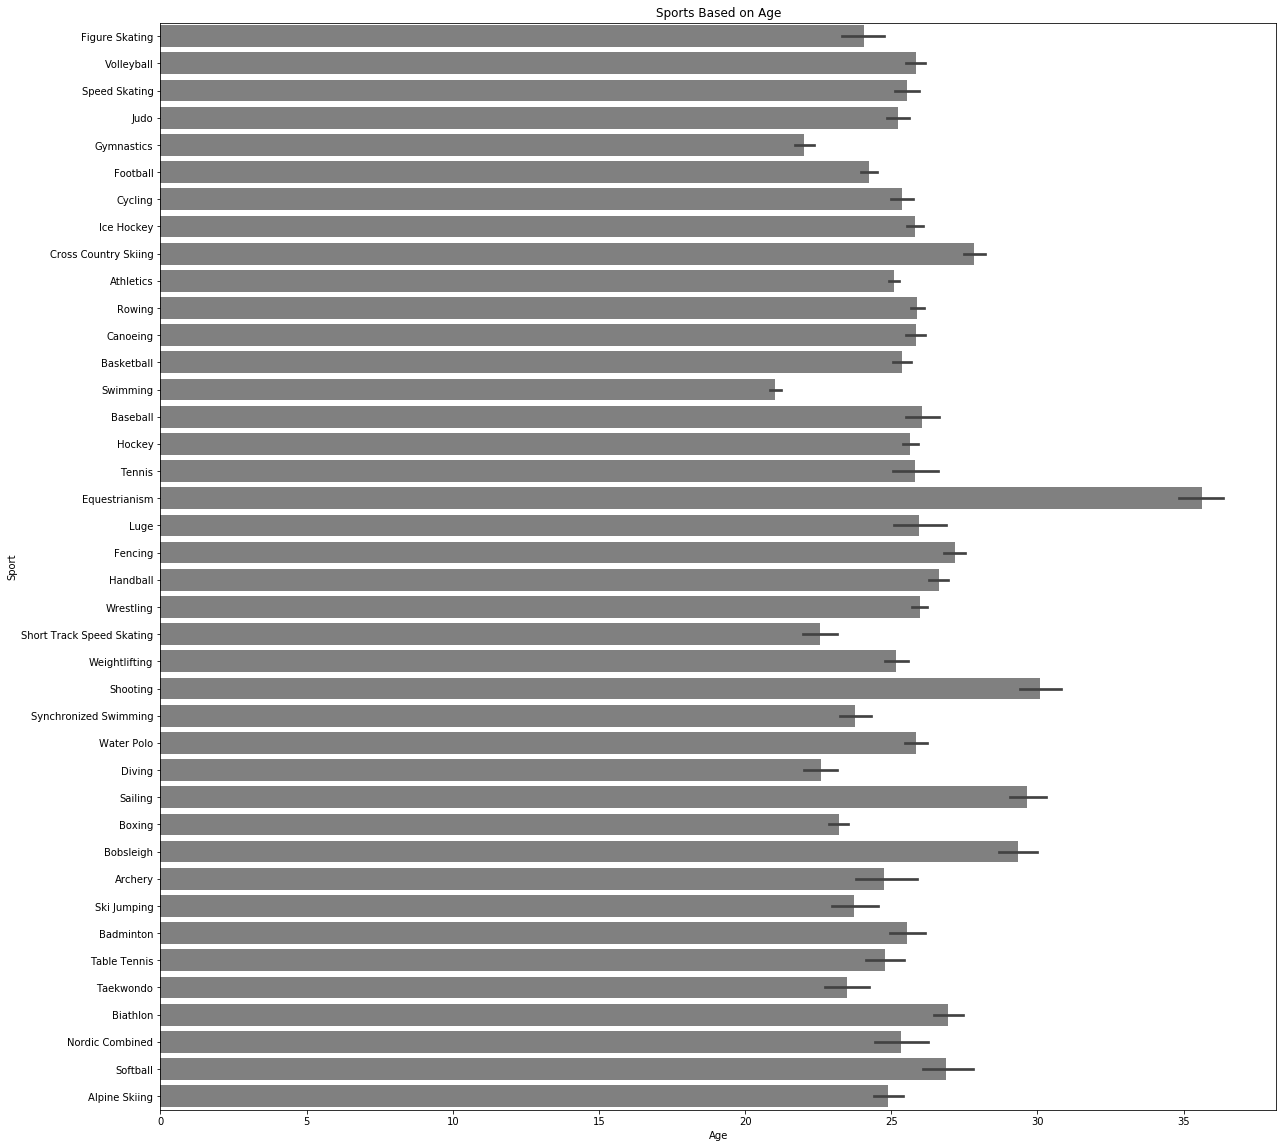

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(20,20))
sns.barplot(
    x=train['Age'], 
    y=train['Sport'], 
    color='grey'
)
plt.title('Sports Based on Age');

In [30]:
import category_encoders as ce  # !pip install category_encoders==2.*
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [31]:
#LOGISITC REGRESSION
from sklearn.linear_model import LogisticRegression
lr = make_pipeline(
    ce.OrdinalEncoder(),
    LogisticRegression(solver='lbfgs', multi_class='auto', n_jobs=-1)
)

lr.fit(X_train, y_train)
print('Logistic Regression:')
print('Train Accuracy', lr.score(X_train, y_train))
print('Validation Accuracy', lr.score(X_val, y_val))

Logistic Regression:
Train Accuracy 0.17976330099157692
Validation Accuracy 0.18272921108742005


In [32]:
#RANDOMFOREST CLASSIFER
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1, random_state=42)
)

# Fit on train and score on val
pipeline.fit(X_train, y_train)
print('Random Forest Validation Accuracy:', pipeline.score(X_val, y_val))

Random Forest Validation Accuracy: 0.42388059701492536


In [33]:
print('X_train shape before encoding', X_train.shape)

encoder = pipeline.named_steps['ordinalencoder']
encoded_df = encoder.transform(X_train)

print('X_train shape after encoding', encoded_df.shape)

X_train shape before encoding (18758, 6)
X_train shape after encoding (18758, 6)


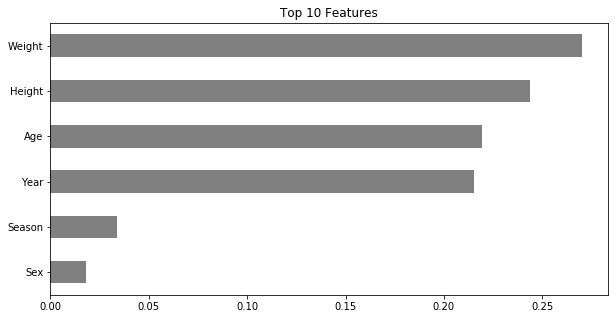

In [34]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, encoded_df.columns)

# Plot top n feature importances
n = 10
plt.figure(figsize=(10, n/2))
plt.title(f'Top {n} Features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [35]:
transformers = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='median')
)

X_train_transformed = transformers.fit_transform(X_train)
X_val_transformed = transformers.fit_transform(X_val) 

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_transformed, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [36]:
import numpy as np
import eli5 # !pip install eli5
from eli5.sklearn import PermutationImportance

#PERMUTAION IMPORTANCE
#1. Calculate permutation importances
permuter = PermutationImportance(
    model, 
    scoring='accuracy',
    n_iter=5,
    random_state=42
)

permuter.fit(X_val_transformed, y_val)

/Users/amybeisel/opt/anaconda3/envs/AmysSpecial/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/amybeisel/opt/anaconda3/envs/AmysSpecial/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


PermutationImportance(cv='prefit',
                      estimator=RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fr

In [37]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

Weight    0.225032
Height    0.199062
Year      0.145672
Season    0.128998
Age       0.115778
Sex       0.114797
dtype: float64

In [38]:
eli5.show_weights(
    permuter,
    top=None, #Shows all features
    feature_names=feature_names)

Weight,Feature
0.2250 ± 0.0079,Weight
0.1991 ± 0.0080,Height
0.1457 ± 0.0073,Year
0.1290 ± 0.0040,Season
0.1158 ± 0.0067,Age
0.1148 ± 0.0046,Sex


In [39]:
minimum_importance = 0 

mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask] # Subsetting with just the important features
X_train = X_train[features]

In [40]:
#PERMUTAION IMPORANCE
X_val = X_val[features]

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)
pipeline.fit(X_train, y_train)
score_with = pipeline.score(X_val, y_val)
print(f'Permutaion Importance Validation Accuracy: {score_with}')

Permutaion Importance Validation Accuracy: 0.42388059701492536


In [41]:
#XGBOOST CLASSIFIER
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Sex', 'Season'], drop_invariant=False,
                                handle_missing='value', handle_unknown='value',
                                mapping=[{'col': 'Sex', 'data_type': dtype('O'),
                                          'mapping': M      1
F      2
NaN   -2
dtype: int64},
                                         {'col': 'Season',
                                          'data_type': dtype('O'),
                                          'mapping': Winter    1
Summer    2
NaN      -2
dtype: int64}],
                                return_df=True, verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
     

In [42]:
# XGBOOST CLASSIFIER
# Accuracy went down compared to Random Forest. 
from sklearn.metrics import accuracy_score

y_pred = pipeline.predict(X_val)
print('XGBoost Validation Accuracy', accuracy_score(y_val, y_pred))

XGBoost Validation Accuracy 0.36886993603411516


In [43]:
#XGBOOST
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

model = XGBClassifier(
    n_estimators=1000, # <= [up to] 1000 trees (but depends on early stopping)
    max_depth = 7, # Deeper Trees for high cardinality categories
    learning_rate = 0.5, 
    n_jobs=-1,
)


eval_set = [(X_train_encoded, y_train),
            (X_val_encoded, y_val)]

model.fit(X_train_encoded, y_train,
          eval_set=eval_set,
          eval_metric='merror',
          early_stopping_rounds=50 ) # Stop if the score hasn't imporved in the last 50 rounds)

[0]	validation_0-merror:0.631091	validation_1-merror:0.668657
Multiple eval metrics have been passed: 'validation_1-merror' will be used for early stopping.

Will train until validation_1-merror hasn't improved in 50 rounds.
[1]	validation_0-merror:0.600757	validation_1-merror:0.655864
[2]	validation_0-merror:0.580232	validation_1-merror:0.640512
[3]	validation_0-merror:0.564186	validation_1-merror:0.631343
[4]	validation_0-merror:0.549579	validation_1-merror:0.625373
[5]	validation_0-merror:0.539237	validation_1-merror:0.622601
[6]	validation_0-merror:0.529747	validation_1-merror:0.617697
[7]	validation_0-merror:0.521964	validation_1-merror:0.613859
[8]	validation_0-merror:0.516206	validation_1-merror:0.61322
[9]	validation_0-merror:0.509329	validation_1-merror:0.613433
[10]	validation_0-merror:0.501013	validation_1-merror:0.612367
[11]	validation_0-merror:0.493176	validation_1-merror:0.611727
[12]	validation_0-merror:0.484753	validation_1-merror:0.609168
[13]	validation_0-merror:0.47

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

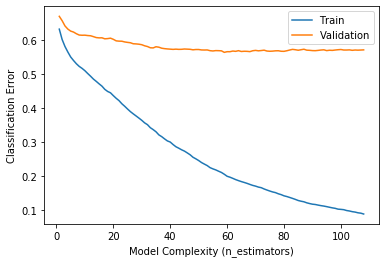

In [44]:

results = model.evals_result()
train_error = results['validation_0']['merror']
val_error = results['validation_1']['merror']
epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label="Train")
plt.plot(epoch, val_error, label="Validation")
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
#plt.ylim((1, .1)) #Turn this on and off to see the full plt 
plt.legend();

In [45]:
encoder = ce.OrdinalEncoder()

X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

final_model = RandomForestClassifier(n_estimators=100, 
                               max_features='auto', random_state=42, 
                               n_jobs=-1)
final_model.fit(X_train_encoded, y_train)


print('Validation Accuracy', final_model.score(X_val_encoded, y_val))


Validation Accuracy 0.42388059701492536


In [46]:
final_pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    RandomForestClassifier(n_estimators=100, 
                               max_features='auto', random_state=42, 
                               n_jobs=-1)
)
# Fit on train, score on val
final_pipeline.fit(X_train, y_train)
print('Validation Accuracy', final_pipeline.score(X_val, y_val))

Validation Accuracy 0.42388059701492536


In [47]:
# from joblib import dump
# dump(final_pipeline, 'final_pipeline.joblib', compress=True)

In [48]:
# import joblib
# from joblib import load
# joblib_model = joblib.load('final_pipeline.joblib')

In [49]:
import joblib
import sklearn
import category_encoders as ce
import xgboost

print(f'joblib=={joblib.__version__}')
print(f'scikit-learn=={sklearn.__version__}')
print(f'category_encoders=={ce.__version__}')
print(f'xgboost=={xgboost.__version__}')


joblib==0.14.1
scikit-learn==0.22.1
category_encoders==2.1.0
xgboost==0.90


In [54]:
def predict(sex,age,height,weight,year,season):
    df = pd.DataFrame(
        columns=['Sex', 'Age', 'Height', 'Weight','Year','Season'], 
        data=[[sex,age,height,weight,year,season]]
    )
    y_pred = final_pipeline.predict_proba(df)[0]
    return y_pred
    

In [55]:
final_pipeline.classes_

array(['Alpine Skiing', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing',
       'Cross Country Skiing', 'Cycling', 'Diving', 'Equestrianism',
       'Fencing', 'Figure Skating', 'Football', 'Gymnastics', 'Handball',
       'Hockey', 'Ice Hockey', 'Judo', 'Luge', 'Nordic Combined',
       'Rowing', 'Sailing', 'Shooting', 'Short Track Speed Skating',
       'Ski Jumping', 'Softball', 'Speed Skating', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'],
      dtype=object)

In [61]:
y_pred = predict('Male', 30, 198, 86, 1950, 'Winter')
print (y_pred)
import numpy as np
sports = final_pipeline.classes_
top_5_idx = np.argsort(y_pred)[-5:]
top_5_probs = [y_pred[i] for i in top_5_idx]
top_5_sports = [sports[i] for i in top_5_idx]
print (top_5_idx)
print(top_5_probs)
print(top_5_sports)


[0.   0.   0.02 0.   0.   0.05 0.   0.13 0.   0.   0.15 0.   0.   0.
 0.   0.02 0.   0.   0.   0.   0.41 0.   0.   0.   0.   0.   0.   0.
 0.02 0.   0.19 0.   0.   0.   0.   0.   0.   0.01 0.   0.  ]
[ 5  7 10 30 20]
[0.05, 0.13, 0.15, 0.19, 0.41]
['Basketball', 'Bobsleigh', 'Cross Country Skiing', 'Speed Skating', 'Ice Hockey']


In [65]:
# using dictionary comprehension 
# to convert lists to dictionary 
top_5_dict = {top_5_sports[i]: top_5_probs[i] for i in range(len(top_5_sports))}
top_5_dict

{'Basketball': 0.05,
 'Bobsleigh': 0.13,
 'Cross Country Skiing': 0.15,
 'Speed Skating': 0.19,
 'Ice Hockey': 0.41}

In [66]:
df = pd.DataFrame.from_dict(top_5_dict, orient = 'index').reset_index()
df.columns = ['Sport','Probability']
df

,Sport,Probability
0,Basketball,0.05
1,Bobsleigh,0.13
2,Cross Country Skiing,0.15
3,Speed Skating,0.19
4,Ice Hockey,0.41


In [ ]:
import ipywidgets as widgets

In [ ]:
# import plotly.express as px
# fig = px.bar(df, x='Sport', y='Probability')
# fig.show()

In [ ]:
# import plotly.graph_objects as go


# fig = go.Figure(go.Bar(
#              x = ["Sport"],
#              y = ["Probability"]))

# fig.update_layout(
#     title = 'Top 5 Sports',
#     xaxis_title = "Sport",
#     yaxis_title = "Probability",
#     font=dict(
#         family="Courier New, monospace",
#         size=18,
#         color="#7f7f7f"
#     )
# )

# fig.show()
    

In [ ]:
df

In [76]:
def predict(gender,age,height,weight,year,season):
    df = pd.DataFrame(
        columns=['Sex', 'Age', 'Height', 'Weight','Year','Season'], 
        data=[[gender,age,height,weight,year,season]]
    )
    y_pred = final_pipeline.predict_proba(df)[0]
    sports = final_pipeline.classes_
    top_5_idx = np.argsort(y_pred)[-5:]
    top_5_probs = [y_pred[i] for i in top_5_idx]
    top_5_sports = [sports[i] for i in top_5_idx]
    top_5_dict = {top_5_sports[i]: top_5_probs[i] for i in range(len(top_5_sports))}
    output_df = pd.DataFrame(top_5_dict, columns = ['Sport', 'Probability'])
    #fig = px.bar(output_df, x='Sport', y='Probability')
    #return fig
    return top_5_dict

In [79]:
y_pred = predict('Male', 30, 198, 86, 1950, 'Winter')
y_pred

{'Basketball': 0.05,
 'Bobsleigh': 0.13,
 'Cross Country Skiing': 0.15,
 'Speed Skating': 0.19,
 'Ice Hockey': 0.41}

In [68]:
final_pipeline.classes_

array(['Alpine Skiing', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Biathlon', 'Bobsleigh', 'Boxing', 'Canoeing',
       'Cross Country Skiing', 'Cycling', 'Diving', 'Equestrianism',
       'Fencing', 'Figure Skating', 'Football', 'Gymnastics', 'Handball',
       'Hockey', 'Ice Hockey', 'Judo', 'Luge', 'Nordic Combined',
       'Rowing', 'Sailing', 'Shooting', 'Short Track Speed Skating',
       'Ski Jumping', 'Softball', 'Speed Skating', 'Swimming',
       'Synchronized Swimming', 'Table Tennis', 'Taekwondo', 'Tennis',
       'Volleyball', 'Water Polo', 'Weightlifting', 'Wrestling'],
      dtype=object)

In [ ]:
# test score
y_pred =final_model.predict(X_test_encoded)
class_index=1
y_pred_proba = final_model.predict_proba(X_test_encoded)[:, class_index]
score = final_model.score(X_test_encoded, y_test)
print(f'Test Score: {score}')

In [ ]:
import shap 
explainer = shap.TreeExplainer(model)

In [ ]:
X_test_encoded.iloc[[1]]

In [ ]:
test.iloc[[1]]

In [ ]:
# Calculate Shap values
choosen_instance = X_test_encoded.iloc[[1]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
X_test.iloc[[45]]

In [ ]:
test.iloc[[45]]

In [ ]:
# Calculate Shap values
choosen_instance = X_test_encoded.iloc[[45]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
X_test.iloc[[420]]

In [ ]:
test.iloc[[420]]

In [ ]:
# Calculate Shap values
choosen_instance = X_test_encoded.iloc[[420]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [ ]:
shap.summary_plot(shap_values, X_train)